In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns
sns.set()

In [24]:
raw_csv_data = pd.read_csv("data/Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, format = "%d/%m/%Y")
df_comp.set_index("date",inplace = True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')
df_comp['market_value'] = df_comp.ftse

In [25]:
size = int(len(df_comp) * 0.8)
df,df_test = df_comp.iloc[:size],df_comp.iloc[size:]

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
def LLR_test(mod_1,mod_2,DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = 2 * (L2 - L1)
    p=chi2.sf(LR,DF).round(3)
    return p

In [28]:
df['returns'] = df.market_value.pct_change(1) * 100

In [29]:
model_ar_1_i_1_ma_1 = ARIMA(df.market_value,order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27604.005
Date:                Tue, 23 Nov 2021   AIC                          55214.010
Time:                        18:25:49   BIC                          55233.574
Sample:                    01-07-1994   HQIC                         55220.866
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7459      0.059     12.653      0.000       0.630       0.861
ma.L1         -0.7919      0.053    -14.924      0.000      -0.896      -0.688
sigma2      3498.7784     40.933     85.476      0.000    3418.551    3579.005
===================================================================================
Ljung-Box (L1) (Q):                   2.63   Jarque-Bera (JB):              3326.22
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

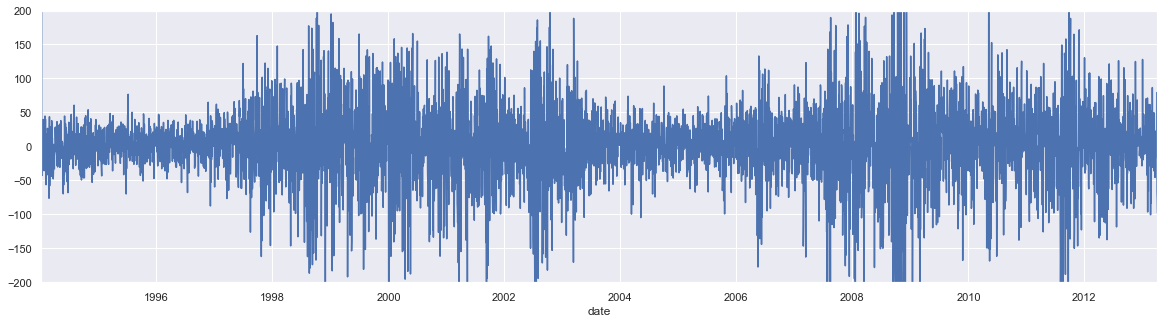

In [30]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
df.res_ar_1_i_1_ma_1.plot(figsize=(20,5))
plt.ylim(-200,200)
plt.show()

sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:],lags=40,zero=False)
plt.title("ACF for Residuals for Prices",size =20)
plt.ylim(-0.05,0.05)
plt.show()

The 3rd and 4th lags seem highly significant, which suggests that these should be included in the model. 6th and 8th are also border-line significant.This means that we should look at all possible models from ARIMA(1,1,1) to ARIMA(4,1,4). That is 15 models in addition to ARIMA(1,1,1). Instructors has shortlisted the models that performed well, ie. the models which had all coefficients significant at the 5% level. This yields 5 models -

ARIMA(1,1,2),ARIMA(1,1,3),ARIMA(2,1,1),ARIMA(3,1,1),ARIMA(3,1,2)

### Higher Lag ARIMA Models

In [31]:
model_ar_1_i_1_ma_2 = ARIMA(df.market_value,order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
model_ar_1_i_1_ma_3 = ARIMA(df.market_value,order=(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
model_ar_2_i_1_ma_1 = ARIMA(df.market_value,order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
model_ar_3_i_1_ma_1 = ARIMA(df.market_value,order=(3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()
model_ar_3_i_1_ma_2 = ARIMA(df.market_value,order=(3,1,2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit()

In [32]:
print("\n ARIMA(1,1,1) : \tLL = ",results_ar_1_i_1_ma_1.llf,"\tAIC = ",results_ar_1_i_1_ma_1.aic)
print("\n ARIMA(1,1,2) : \tLL = ",results_ar_1_i_1_ma_2.llf,"\tAIC = ",results_ar_1_i_1_ma_2.aic)
print("\n ARIMA(1,1,3) : \tLL = ",results_ar_1_i_1_ma_3.llf,"\tAIC = ",results_ar_1_i_1_ma_3.aic)
print("\n ARIMA(2,1,1) : \tLL = ",results_ar_2_i_1_ma_1.llf,"\tAIC = ",results_ar_2_i_1_ma_1.aic)
print("\n ARIMA(3,1,1) : \tLL = ",results_ar_3_i_1_ma_1.llf,"\tAIC = ",results_ar_3_i_1_ma_1.aic)
print("\n ARIMA(3,1,2) : \tLL = ",results_ar_3_i_1_ma_2.llf,"\tAIC = ",results_ar_3_i_1_ma_2.aic)


 ARIMA(1,1,1) : 	LL =  -27604.005116787335 	AIC =  55214.01023357467

 ARIMA(1,1,2) : 	LL =  -27600.407632541024 	AIC =  55208.81526508205

 ARIMA(1,1,3) : 	LL =  -27590.723481949706 	AIC =  55191.44696389941

 ARIMA(2,1,1) : 	LL =  -27600.13055105335 	AIC =  55208.2611021067

 ARIMA(3,1,1) : 	LL =  -27592.336116474202 	AIC =  55194.672232948404

 ARIMA(3,1,2) : 	LL =  -27590.92031805083 	AIC =  55193.84063610166


Clearly, ARIMA(1,1,3) tops our list. As ARIMA(1,1,2) and ARIMA (1,1,1) are nested to it, we need to do an LLR test.

In [33]:
print("\nARIMA(1,1,3) vs ARIMA(1,1,2) = ", LLR_test(model_ar_1_i_1_ma_2,model_ar_1_i_1_ma_3))
print("\nARIMA(1,1,3) vs ARIMA(1,1,1) = ", LLR_test(model_ar_1_i_1_ma_1,model_ar_1_i_1_ma_3,DF=2))


ARIMA(1,1,3) vs ARIMA(1,1,2) =  0.0

ARIMA(1,1,3) vs ARIMA(1,1,1) =  0.0


ARIMA(1,1,3) seems to be the best. So, let us check the ACF of residuals.

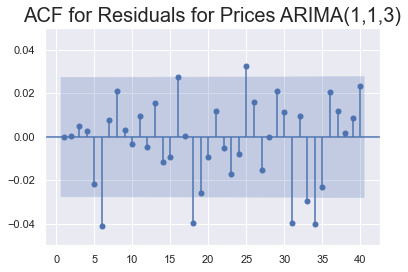

In [34]:
df['res_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_3[1:],lags=40,zero=False)
plt.title("ACF for Residuals for Prices ARIMA(1,1,3)",size =20)
plt.ylim(-0.05,0.05)
plt.show()

The 6th lag seems significant, which means that we have to consider models with LAG 6, that is all models under ARIMA(6,1,6). The instructor has found the important ones for us, the ones in which all coefficients are siginificant. ARIMA(6,1,3) and ARIMA(5,1,1).

In [35]:
model_ar_6_i_1_ma_3 = ARIMA(df.market_value,order=(6,1,3))
results_ar_6_i_1_ma_3 = model_ar_6_i_1_ma_3.fit()
model_ar_5_i_1_ma_1 = ARIMA(df.market_value,order=(5,1,1))
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit()

In [36]:
print("\n ARIMA(1,1,3) : \tLL = ",results_ar_1_i_1_ma_3.llf,"\tAIC = ",results_ar_1_i_1_ma_3.aic)
print("\n ARIMA(6,1,3) : \tLL = ",results_ar_6_i_1_ma_3.llf,"\tAIC = ",results_ar_6_i_1_ma_3.aic)
print("\n ARIMA(5,1,1) : \tLL = ",results_ar_5_i_1_ma_1.llf,"\tAIC = ",results_ar_5_i_1_ma_1.aic)


 ARIMA(1,1,3) : 	LL =  -27590.723481949706 	AIC =  55191.44696389941

 ARIMA(6,1,3) : 	LL =  -27583.858499808848 	AIC =  55187.716999617696

 ARIMA(5,1,1) : 	LL =  -27586.84460958768 	AIC =  55187.68921917536


ARIMA(6,1,3) seems based on Log likelihood. We can also use LLR test to check as the other two models are nested.

In [37]:
print("\nARIMA(6,1,3) vs ARIMA(1,1,3) = ", LLR_test(model_ar_1_i_1_ma_3,model_ar_6_i_1_ma_3,DF=5))
print("\nARIMA(6,1,3) vs ARIMA(5,1,1) = ", LLR_test(model_ar_5_i_1_ma_1,model_ar_6_i_1_ma_3,DF=3))
print("\nARIMA(5,1,1) vs ARIMA(1,1,3) = ", LLR_test(model_ar_1_i_1_ma_3,model_ar_5_i_1_ma_1,DF=2))


ARIMA(6,1,3) vs ARIMA(1,1,3) =  0.017

ARIMA(6,1,3) vs ARIMA(5,1,1) =  0.113

ARIMA(5,1,1) vs ARIMA(1,1,3) =  0.021


ARIMA(6,1,3) is better than ARIMA(1,1,3), but not better than ARIMA(5,1,1), which is again better than ARIMA(1,1,3). Therefore, ARIMA(5,1,1) seems to be best.

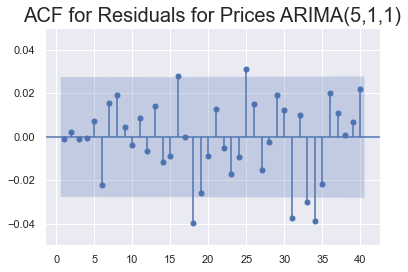

In [38]:
df['res_ar_5_i_1_ma_1'] = results_ar_5_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_5_i_1_ma_1[1:],lags=40,zero=False)
plt.title("ACF for Residuals for Prices ARIMA(5,1,1)",size =20)
plt.ylim(-0.05,0.05)
plt.show()

Now, Lag 6 issue is resolved, and we can see that none of the lags upto 15 are significant.

In [39]:
print(results_ar_5_i_1_ma_1.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -27586.845
Date:                Tue, 23 Nov 2021   AIC                          55187.689
Time:                        18:26:45   BIC                          55233.338
Sample:                    01-07-1994   HQIC                         55203.685
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4006      0.153      2.618      0.009       0.101       0.701
ar.L2         -0.0444      0.011     -4.071      0.000      -0.066      -0.023
ar.L3         -0.0542      0.013     -4.226      0.0

### Higher Layers of Integration.

The main purpose of integration is to make the non-stationary series stationary. If one layer/level of integration accomplishes the same, there's actually no need to go for higher levels. Morover, additional levels add computational complexity and slow down the process. How do we know if the first level of integration made our series stationary? We can first difference and check for stationarity.

In [40]:
df['delta_prices'] = df.market_value.diff(1)
model_delta_ar_1_i_1_ma_1 = ARIMA(df.delta_prices[1:],order=(1,0,1))
results_delta_ar_1_i_1_ma_1=model_delta_ar_1_i_1_ma_1.fit()
results_delta_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 5020
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -27603.666
Date:                Tue, 23 Nov 2021   AIC                          55215.333
Time:                        18:26:50   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5639      0.753      0.749      0.454      -0.911       2.039
ar.L1          0.7476      0.059     12.673      0.000       0.632       0.863
ma.L1         -0.7937      0.053    -14.871      0.000      -0.898      -0.689
sigma2      3496.6352     41.191     84.888      0.000    3415.902    3577.368
===================================================================================
Ljung-Box (L1) (Q):                   2.64   Jarque-Bera (JB):              3327.38
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
sts.adfuller(df.delta_prices[1:])

(-32.2440934957075,
 0.0,
 5,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54845.96104221891)

Seems like this integrated series is stationary. So, we really have no reason to further difference the series.

### ARMAX and ARIMAX models

Our models currently use the previous values of the same time series to predict the current value. In some case, incorporating values from some other series could also be helpful. ARMAX and ARIMAX model do just that. The exog parameter takes the values of the exogenous variables.

In [46]:
model_ar_1_i_1_ma_1_Xspx = ARIMA(df.market_value,exog = df.spx,order=(1,1,1))
results_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()
results_ar_1_i_1_ma_1_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -26693.392
Date:                Tue, 23 Nov 2021   AIC                          53394.784
Time:                        18:42:55   BIC                          53420.869
Sample:                    01-07-1994   HQIC                         53403.925
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.6928      0.035     76.407      0.000       2.624       2.762
ar.L1          0.2571      0.029      8.812      0.000       0.200       0.314
ma.L1         -0.5460      0.025    -21.791      0.000      -0.595      -0.497
sigma2      2433.0771     27.350     88.961      0.000    2379.472    2486.682
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):              4423.90
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

When the author does this, the coefficient of spx turns out to be insignificant, but when I try it it turns out to be significant. Not only that, the cofficients for the AR and MA lags in my model are also considerably different.

### Seasonal ARIMA

SARIMA Models include extra set of terms for capturing seasonal terms. SARIMA(p,d,q)(P,D,Q,S). P,D,Q